In [1]:
import numpy as np
from scipy.stats import mode

def get_word_info(s):
    words = s.replace("\n", "").replace(" ", "").split(",")
    word_lens = [len(word) for word in words]
    return len(words), sum(word_lens), np.mean(word_lens), np.median(word_lens), mode(word_lens).mode[0]

In [2]:
s = """Aging, Appreciation, Bash, Bells, Blended, Bliss, Brand, Brunch, Bubbles,
Cases, Chill, Class, Cold, Crystal, Dinner, Drink, Elegant, Fields, Fill,
Finish, Flute, Fuss, Gala, Glass, Happiness, Impacts, Lace, Magnum,
Open, Palate, Pale, Power, Quality, Region, Sips, Sophisticated,
Sparkling, Strawberries, Sugar, Sweet, Trendy, Ultimate, Vineyard, White,
Wine"""

get_word_info(s)

(45, 271, 6.022222222222222, 5.0, 5)

In [144]:
# Word sets, shortest-to-longest mean length

s1 = """Bags, Belt, Bench, Bill, Brand, Case, Cash, Catalogue, City, Coat, Color,
Denim, Designer, Formal, Gift, Hanger, Hats, Hems, Hours, Inventory,
Linen, Measure, Merchandise, Mirror, Model, Money, Open, Pair, Pants,
Price, Prom, Purse, Rack, Register, Retail, Room, Sale, Season, Security,
Selection, Shelves, Shoes, Size, Skirt, Spend, Splurge, Spree, Suit, Tags,
Ties, Toys, Trend, Trip, Windows"""
s2 = """Baking, Bars, Beds, Bins, Bowls, Chair, Clock, Coffee, Cups, Curtain,
Design, Desk, Dining, Drains, Dresser, Duvet, Flowers, Flute, Frames,
Futon, Glasses, Glue, Grill, Home, Lamp, Light, Mats, Oven, Photos,
Pillows, Plates, Pots, Print, Radio, Rake, Receiver, Rugs, Safes, Scissors,
Sofas, Stool, Storage, Suite, Taps, Television, Throw, Tissue, Towels,
Trays, Tubs, Unit, Utensils, View, Wines"""
s3 = """Agenda, Annual, Begin, Best, Book, Celebrate, Clock, Complete,
Continue, Copyright, Crop, Cycle, Days, Decade, Earth, Edition, Ending,
Eras, Fine, First, Future, History, Last, Leap, Life, Long, Loss, Memo,
Months, News, Number, Olympic, Orbit, Over, Past, Period, Profit,
Publication, Rank, Record, Represent, Review, School, Session, Space,
Span, Spell, Status, Term, Time, Weeks"""
s4 = """Apple, Bake, Berry, Browning, Chocolate, Coating, Cook, Cream,
Delicious, Dessert, Flaky, Fork, Frozen, Full, Half, Heat, Heavy, Honey,
Icing, Ingredients, Kitchen, Layer, Leek, Lemons, Light, Lime, Maple,
Meat, Moist, Oven, Pastry, Piece, Pumpkin, Recipe, Rich, Serve,
Shortening, Slice, Smell, Snack, Sugar, Sweet, Tart, Taste, Tender, Thick,
Topping, Tray, Treat, Vegetables, Yummy"""
s5 = """Alike, Bond, Born, Brother, Caring, Cohabitant, Crib, Dear, Encourage,
Face, Father, Female, Flesh, Fraternity, Genetic, Girls, Head, Hope,
House, Hugs, Life, Looks, Loving, Males, Model, Mother, Names,
Offspring, Older, Protect, Reference, Respect, Role, Root, Secrets,
Siamese, Sister, Task, Teach, Team, Together, Trait, Transition, Trusting,
Twin, Type, Will"""
s6 = """Aging, Appreciation, Bash, Bells, Blended, Bliss, Brand, Brunch, Bubbles,
Cases, Chill, Class, Cold, Crystal, Dinner, Drink, Elegant, Fields, Fill,
Finish, Flute, Fuss, Gala, Glass, Happiness, Impacts, Lace, Magnum,
Open, Palate, Pale, Power, Quality, Region, Sips, Sophisticated,
Sparkling, Strawberries, Sugar, Sweet, Trendy, Ultimate, Vineyard, White,
Wine"""
s7 = """Ages, Animals, Animation, Annual, Boys, Candy, Carol, Celebrations,
Characters, Cheering, Child, Create, Dancing, December, Decorations,
Enchanting, Girls, Hero, Holiday, Holy, Hosts, Hymns, Ideas, Illusion,
Jolly, Kids, Magic, Moral, Movies, Music, Past, Plays, Puppet, Role, Santa,
School, Scrooge, Seasonal, Show, Sleigh, Snow, Tales, Voice, Winter,
Wisdom"""
s8 = """Accept, Admit, Agreement, Charge, Choice, Clear, Code, Coerce,
Complete, Consent, Controversial, Court, Crimes, Deals, Decision,
Declare, Evidence, Fairness, Final, Grant, Guilty, Justice, Lawyers,
Lenience, Lower, Majority, Mercy, Mutual, Negotiated, Pact, Party, Past,
Placed, Plead, Prospects, Quicker, Regrets, Review, Rules, Safe, Sign,
Spin, Terminate, Trial, Wire"""
s9 = """Accommodations, Acre, Activities, Adventure, Alberta, Alpine, Ascent,
Cabins, Climate, Conditions, Descent, Guided, Hills, Lakes, Lift, Lodge,
Melt, Nakiska, Nordic, Peaks, Powder, Resort, Restaurant, Rides, Rivers,
Rock, Route, Scenery, Season, Service, Sleighs, Slope, Sport,
Temperature, Tourism, Treks, Valley, View, Villages, Winter"""
s10 = """Alive, Alpine, Blowers, Bump, Caps, Castles, Cold, Dash, Dogsledding,
Downhill, Festivals, Fests, Fluffy, Freestyle, Glide, Hats, Kids, Machines,
Masquerades, Mitts, Natural, Places, Resorts, Skiing, Skis, Slalom, Sleds,
Sleighrides, Sliding, Slope, Snowbanks, Snowboarding, SnowRafting,
Snowstorms, Soar, White, Zest"""

import pandas as pd

df_raw = []
for i, s in enumerate([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]):
    words = s.replace("\n", "").replace(" ", "").split(",")
    word_lens = [len(word) for word in words]
    df_raw.extend(zip([i]*len(word_lens), word_lens))
    
df = pd.DataFrame(data=df_raw, columns=["word_set", "word_length"])
df

,word_set,word_length
0,0,4
1,0,4
2,0,5
3,0,4
4,0,5
...,...,...
464,9,11
465,9,10
466,9,4
467,9,5


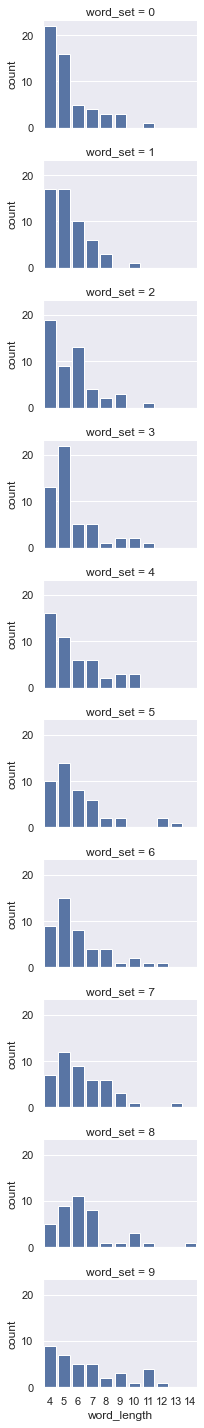

In [112]:
# For each of the word sets, plots the length distributions
# Plot them one after the other, vertically

import seaborn as sns

g = sns.FacetGrid(df, row="word_set", height=2, aspect=1.5)
g.map(sns.countplot, "word_length", order=range(4,15))
# sns.countplot(x="len", data=df)



In [6]:
from collections import Counter

# Letter frequency distributions

df_raw = []
for i, s in enumerate([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]):
    words = s.replace("\n", "").replace(" ", "").split(",")
    letter_counts = Counter(''.join(words).lower())
    df_raw.extend(zip([i]*len(letter_counts), list(letter_counts.keys()), list(letter_counts.values())))
    
df_letters = pd.DataFrame(data=df_raw, columns=["word_set", "letters", "counts"])
df_letters

,word_set,letters,counts
0,0,b,5
1,0,a,19
2,0,g,8
3,0,s,31
4,0,e,38
...,...,...,...
221,9,f,7
222,9,y,2
223,9,k,4
224,9,q,1


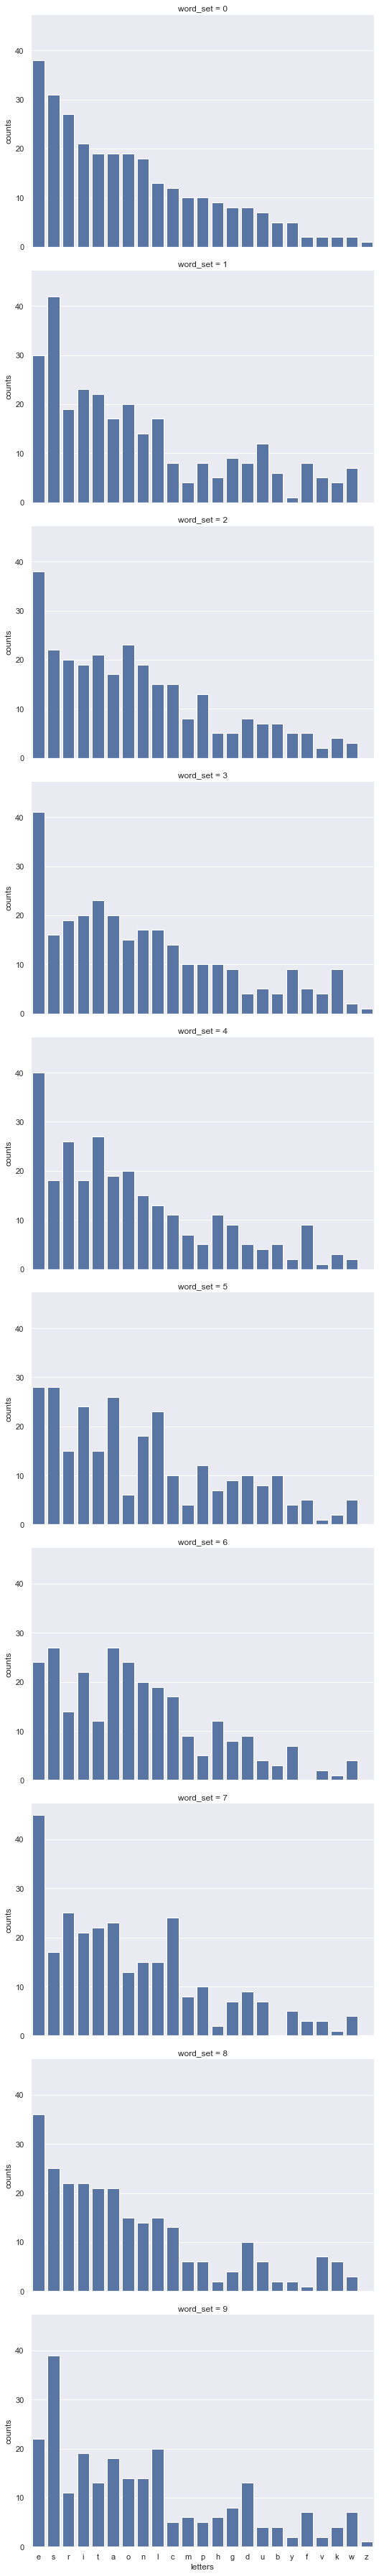

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# plt.figure(figsize = (30,150))
# 

# figure size in inches
# rcParams['figure.figsize'] = 11.7,8.27

# fig, ax = plt.subplots(figsize=(30,150))
g = sns.FacetGrid(df_letters, row="word_set", height=5, aspect=1.5)
g.map(sns.barplot, "letters", "counts", order=df_letters[df_letters.word_set==0].sort_values('counts', ascending=False).letters)

# 

# sns.set(rc = {'figure.figsize':(150,150)})
# sns.countplot(x="len", data=df)


In [48]:
from collections import Counter

# For a given pair of words, count the numer of ways they could overlap.
# Fix one of the two word's orientation to avoid considering redundant rotations.
#
# Efficient approach: for 2 orientation where words are orientated along the same plane, perform a convolution
# For other six orientation it's suffient for 1 representive, and multiply by 6, since it's only a point-intersection.
def get_num_overlaps(w1, w2):
    overlaps = 0
    # Assume that w1 always has the same fixed orientation
    # (1) Assume w2 has the same orientation. Simulate passing the words over each other
    #     and testing for compatible overlaps at the head & tail. Check the reverse orientation too.
    # Pass the shorter word over the longer word.
    if len(w1) < len(w2):
        tmp1, tmp2, tmp2rev = w1, w2, w2[::-1]
    else:
        tmp1, tmp2, tmp2rev = w2, w1, w1[::-1]
    # Left overlap
    for i in range(1,len(tmp1)):
        if tmp1[-i:] == tmp2[:i]:    
            overlaps += 1
        if tmp1[-i:] == tmp2rev[:i]: # check reverse orientation
            overlaps += 1
    # (ignore middle overlap because that implies one is substring of the other which is forbidden)
    # Right overlap
    for i in range(1,len(tmp1)):
        if tmp1[:i] == tmp2[-i:]:
            overlaps += 1
        if tmp1[:i] == tmp2rev[-i:]: # check reverse orientation
            overlaps += 1
    # For all other, just need to check for point-wise overlaps, and multiple the result by 6
    cnt1, cnt2 = Counter(w1), Counter(w2)
    shared_letters = set(cnt1.keys()) & set(cnt2.keys())
    for letter in shared_letters:
        overlaps += cnt1[letter] * cnt2[letter] * 6
    return overlaps
    
    

In [56]:
s10

'Alive, Alpine, Blowers, Bump, Caps, Castles, Cold, Dash, Dogsledding,\nDownhill, Festivals, Fests, Fluffy, Freestyle, Glide, Hats, Kids, Machines,\nMasquerades, Mitts, Natural, Places, Resorts, Skiing, Skis, Slalom, Sleds,\nSleighrides, Sliding, Slope, Snowbanks, Snowboarding, SnowRafting,\nSnowstorms, Soar, White, Zest'

In [145]:
def get_num_overlaps_approx_normed(w1, w2, normed=True):
    """A much more efficient estimate of the number of overlaps. Just count the number of shared letter pairs,
    Don't worry about the specific geometric of words connecting end-to-end, or the multiplicity of e.g. fwd/bwd pairs.
    Good for directionally-correct estimates of the "overlapability" of a set of words.
    """
    cnt1, cnt2 = Counter(w1), Counter(w2)
    shared_letters = set(cnt1.keys()) & set(cnt2.keys())
    scale = len(w1)*len(w2) if normed else 1
    return sum(cnt1[letter]*cnt2[letter]/scale for letter in shared_letters)

In [150]:
# Gave a number of test examples, performs as expected.
# Now, compute and plot the pairwise distributions for each of the word sets.

from collections import Counter

# Letter frequency distributions

df_raw = []
for i, s in enumerate([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]):
    words = s.replace("\n", "").replace(" ", "").lower().split(",")
    overlaps = []
    for j in range(len(words)):
        for k in range(j+1, len(words)):
            overlaps.append((j,k,words[j],words[k],get_num_overlaps_approx_normed(words[j],words[k])))
    df_raw.extend(zip([i]*len(overlaps), *zip(*overlaps)))
    
df_overlaps_normed = pd.DataFrame(data=df_raw, columns=["word_set", "word1_idx", "word2_idx", "word1_idx", "word2_idx", "overlaps"])
df_overlaps_normed


,word_set,word1_idx,word2_idx,word1_idx,word2_idx,overlaps
0,0,0,1,bags,belt,0.0625
1,0,0,2,bags,bench,0.0500
2,0,0,3,bags,bill,0.0625
3,0,0,4,bags,brand,0.1000
4,0,0,5,bags,case,0.1250
...,...,...,...,...,...,...
10904,9,33,35,snowstorms,white,0.0400
10905,9,33,36,snowstorms,zest,0.1000
10906,9,34,35,soar,white,0.0000
10907,9,34,36,soar,zest,0.0625


In [170]:
# Don't know if this really works... going to be the same situation for any randomly-selected word set
# Manually inspect the words and see what highly-overlapping pairs look like

pd.set_option('display.max_rows', 100)
df_overlaps_normed.sort_values('overlaps', ascending=False).head(16)

,word_set,word1_idx,word2_idx,word1_idx,word2_idx,overlaps
5381,3,42,48,tart,treat,0.300000
5380,3,42,47,tart,tray,0.250000
977,0,23,35,mirror,room,0.250000
6731,5,5,34,bliss,sips,0.250000
1159,0,30,35,prom,room,0.250000
5376,3,42,43,tart,taste,0.250000
6895,5,10,18,chill,fill,0.250000
10706,9,16,24,kids,skis,0.250000
509,0,10,35,color,room,0.250000
3853,2,26,43,loss,session,0.250000


In [171]:
df_overlaps_normed.sort_values('overlaps', ascending=False).tail(20)

,word_set,word1_idx,word2_idx,word1_idx,word2_idx,overlaps
3043,2,3,38,best,rank,0.0
7997,6,13,34,december,santa,0.0
8001,6,13,38,december,show,0.0
8003,6,13,40,december,snow,0.0
3036,2,3,31,best,olympic,0.0
1042,0,25,43,money,skirt,0.0
3030,2,3,25,best,long,0.0
4781,3,14,50,half,yummy,0.0
4784,3,15,18,heat,icing,0.0
5243,3,32,35,pumpkin,serve,0.0


In [148]:
df_overlaps_normed[["word_set","overlaps"]].groupby("word_set").sum()

,overlaps
word_set,
0,94.556600
1,92.782184
2,81.268433
3,79.640625
4,73.706633
5,63.292790
6,63.008715
7,70.275362
8,54.856794


In [149]:
df_overlaps_normed[["word_set","overlaps"]].groupby("word_set").mean()

,overlaps
word_set,
0,0.066077
1,0.064837
2,0.063740
3,0.062463
4,0.068184
5,0.063932
6,0.063645
7,0.070985
8,0.070329


In [57]:
# Gave a number of test examples, performs as expected.
# Now, compute and plot the pairwise distributions for each of the word sets.

from collections import Counter

# Letter frequency distributions

df_raw = []
for i, s in enumerate([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]):
    words = s.replace("\n", "").replace(" ", "").lower().split(",")
    overlaps = []
    for j in range(len(words)):
        for k in range(j+1, len(words)):
            overlaps.append((j,k,get_num_overlaps(words[j],words[k])))
    df_raw.extend(zip([i]*len(overlaps), *zip(*overlaps)))
    
df_overlaps = pd.DataFrame(data=df_raw, columns=["word_set", "word1_idx", "word2_idx", "overlaps"])
df_overlaps


,word_set,word1_idx,word2_idx,overlaps
0,0,0,1,7
1,0,0,2,7
2,0,0,3,7
3,0,0,4,13
4,0,0,5,12
...,...,...,...,...
10904,9,33,35,12
10905,9,33,36,24
10906,9,34,35,0
10907,9,34,36,6


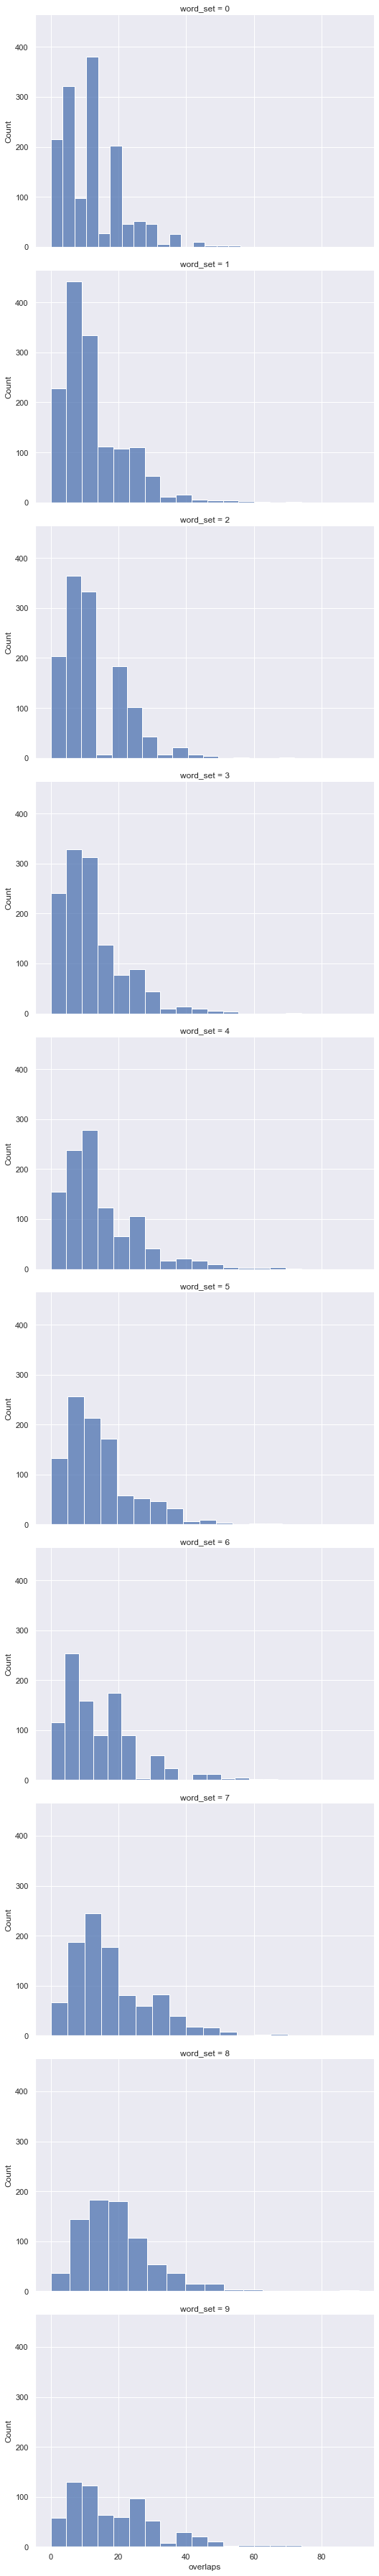

In [60]:
g = sns.FacetGrid(df_overlaps, row="word_set", height=5, aspect=1.5)
g.map(sns.histplot, "overlaps", bins=16)


In [62]:
# For each wordset, get the expected number of overlaps between a randomly selected pair of words
df_overlaps[["word_set","overlaps"]].groupby("word_set").mean()

,overlaps
word_set,
0,11.877009
1,11.992313
2,11.911373
3,11.862745
4,14.283996
5,14.068687
6,14.406061
7,17.458586
8,18.074359


In [63]:
df_overlaps[["word_set","overlaps"]].groupby("word_set").median()

,overlaps
word_set,
0,12.0
1,12.0
2,12.0
3,12.0
4,12.0
5,12.0
6,12.0
7,13.0
8,18.0


In [64]:
# Fairly consistent, expect for last few which blow up the mean
# What if we count the *total number* of possible overlaps
# Answer: then the impressive counts of the last 2-3 no longer look so good
df_overlaps[["word_set","overlaps"]].groupby("word_set").sum()

,overlaps
word_set,
0,16996
1,17161
2,15187
3,15125
4,15441
5,13928
6,14262
7,17284
8,14098


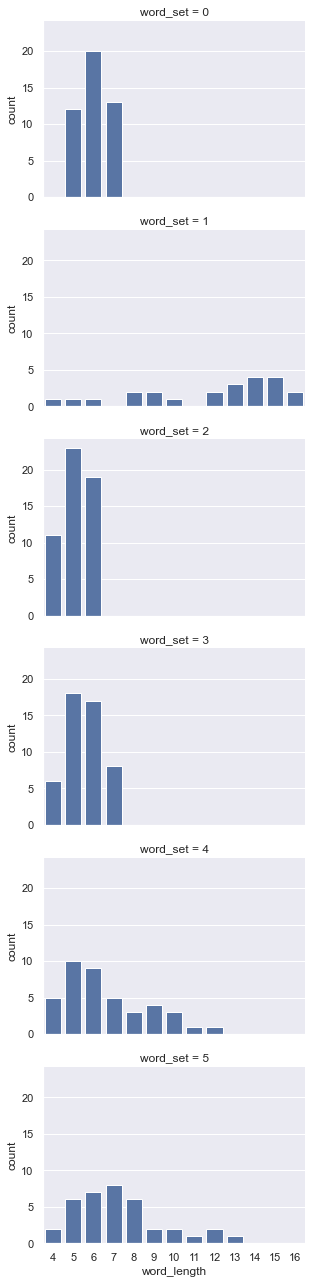

In [135]:
# What about in my word sets?
# Do it for hypothetical scaling factor of 1.23 to match that part of the distributions

flamboyant_words = ['fancy', 'brash', 'suave', 'gruff', 'spain', 'macho', 'mogul', 'style', 'brown', 'fiery', 'cocky', 'canny', 'flashy', 'genial', 'feisty', 'urbane', 'dapper', 'boyish', 'jovial', 'rotund', 'portly', 'rakish', 'france', 'antics', 'tycoon', 'aspect', 'quirky', 'appear', 'haired', 'shrewd', 'silvio', 'demure', 'affable', 'voluble', 'persona', 'splashy', 'delonix', 'showman', 'bizarre', 'stylish', 'england', 'curious', 'amiable', 'onetime', 'elegant']
deep_learning_words = ['relu', 'darpa', 'nvidia', 'waveform', 'imagenet', 'algorithm', 'board game', 'drug design', 'optimization', 'neocognitron', 'probabilistic', 'machine vision', 'george cybenko', 'bioinformatics', 'computer vision', 'regularization', 'generalization', 'machine learning', 'generative model', 'image processing', 'sigmoid function', 'biological system', 'boltzmann machine']
couch_words = ['seat', 'cast', 'room', 'bunk', 'word', 'dorm', 'kids', 'tent', 'bare', 'door', 'pack', 'divan', 'chair', 'porch', 'bench', 'frame', 'comfy', 'stool', 'futon', 'squab', 'lobby', 'slept', 'towel', 'fills', 'stuff', 'lunch', 'stuck', 'wakes', 'empty', 'floor', 'loose', 'socks', 'mitts', 'wears', 'daybed', 'settee', 'pillow', 'redact', 'closet', 'primer', 'ground', 'phrase', 'spring', 'greece', 'sleeps', 'locker', 'howdah', 'huddle', 'asleep', 'tucked', 'dining', 'fridge', 'pantry']
yoga_words = ['soul', 'yogi', 'nadi', 'mind', 'sati', 'guru', 'asana', 'prana', 'vedas', 'jnana', 'zumba', 'tummo', 'reiki', 'vyasa', 'bodhi', 'hatha', 'shiva', 'yamas', 'vidya', 'tapas', 'yajna', 'nanak', 'karma', 'pooja', 'qigong', 'moksha', 'cardio', 'panini', 'bhakti', 'chakra', 'kathak', 'cancer', 'asthma', 'niyama', 'dharma', 'siddha', 'sutras', 'taoist', 'sufism', 'strabo', 'sahaja', 'workout', 'jainism', 'fitness', 'sramana', 'samadhi', 'pilates', 'aerobic', 'massage']
new_couch_words = ['seat', 'cast', 'room', 'bunk', 'word', 'divan', 'chair', 'porch', 'bench', 'frame', 'comfy', 'stool', 'futon', 'squab', 'lobby', 'daybed', 'settee', 'pillow', 'redact', 'closet', 'primer', 'ground', 'phrase', 'spring', 'armrest', 'ottoman', 'cubicle', 'pajamas', 'priming', 'upstairs', 'mattress', 'bathrobe', 'comforter', 'davenport', 'formulate', 'undercoat', 'tete-a-tete', 'downstairs', 'articulate', 'television', 'chesterfield']
new_yoga_words = ['soul', 'yogi', 'asana', 'prana', 'vedas', 'jnana', 'zumba', 'tummo', 'qigong', 'moksha', 'cardio', 'panini', 'bhakti', 'chakra', 'kathak', 'workout', 'jainism', 'fitness', 'sramana', 'samadhi', 'pilates', 'aerobic', 'massage', 'exercise', 'hinduism', 'sannyasa', 'sanskrit', 'hypnosis', 'ayurveda', 'kundalini', 'vajrayana', 'discipline', 'relaxation', 'acupuncture', 'epistemology', 'gorakshanath', 'physiotherapy']

df_raw = []
for i, words in enumerate([flamboyant_words,deep_learning_words,couch_words,yoga_words,new_couch_words,new_yoga_words]):
    word_lens = [len(word.replace(" ", "")) for word in words]
    df_raw.extend(zip([i]*len(word_lens), word_lens))
    
df = pd.DataFrame(data=df_raw, columns=["word_set", "word_length"])
# df['word_length'] = df['word_length'].astype(str)

g = sns.FacetGrid(df, row="word_set", height=3, aspect=1.5)
g.map(sns.countplot, "word_length", order=range(4,17))
# g.set(xlim=(-5, 15))

In [136]:
# Distributions look VERY different from Ouellet's, extremely peaked around 4-7
# How does this effect the pairwise counts...?

from collections import Counter

# Letter frequency distributions

df_raw = []
for i, words in enumerate([flamboyant_words,deep_learning_words,couch_words,yoga_words,new_couch_words,new_yoga_words]):
    words = [word.replace(" ", "").lower() for word in words]
    overlaps = []
    for j in range(len(words)):
        for k in range(j+1, len(words)):
            overlaps.append((j,k,get_num_overlaps(words[j],words[k])))
    df_raw.extend(zip([i]*len(overlaps), *zip(*overlaps)))
    
df_overlaps = pd.DataFrame(data=df_raw, columns=["word_set", "word1_idx", "word2_idx", "overlaps"])
df_overlaps

,word_set,word1_idx,word2_idx,overlaps
0,0,0,1,6
1,0,0,2,6
2,0,0,3,13
3,0,0,4,12
4,0,0,5,12
...,...,...,...,...
5278,5,33,35,36
5279,5,33,36,36
5280,5,34,35,30
5281,5,34,36,67


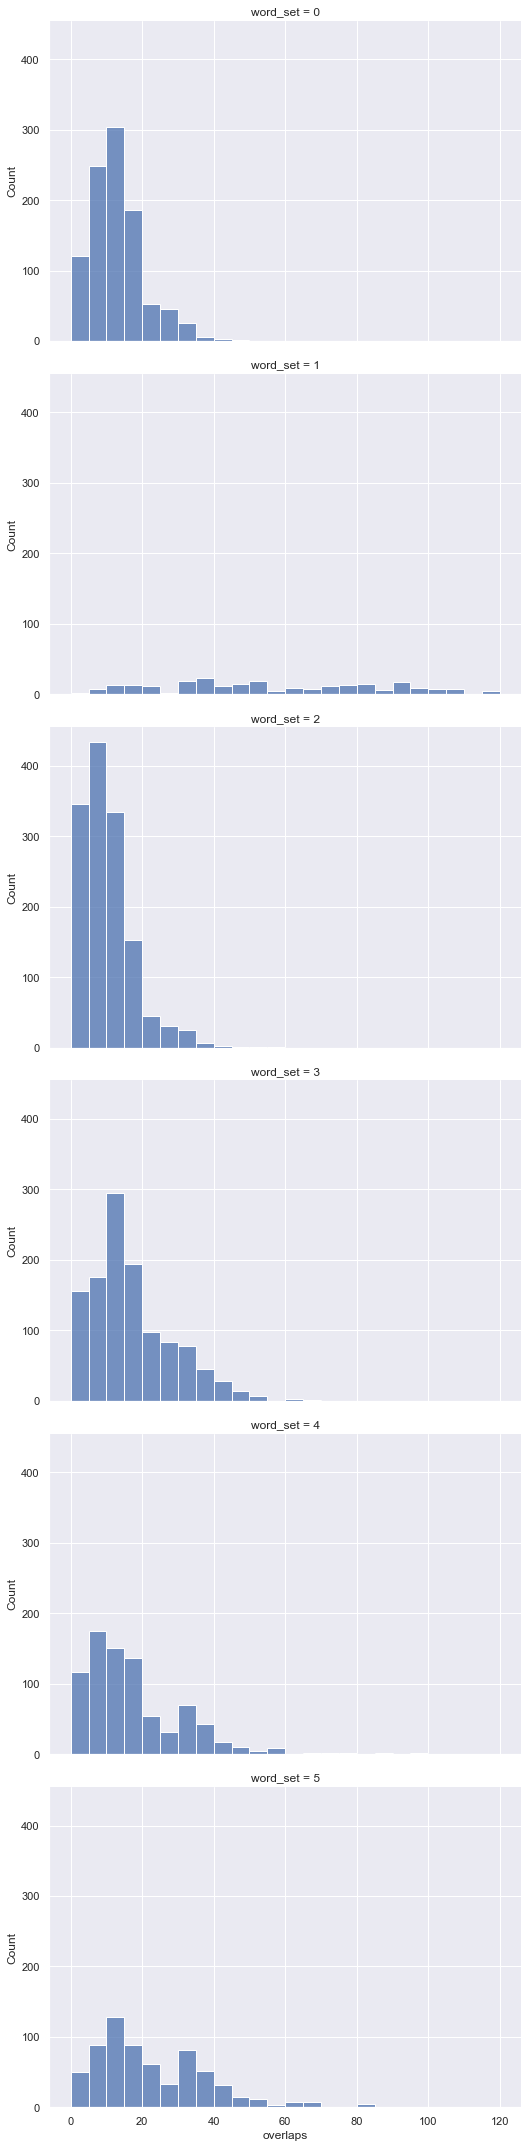

In [143]:
g = sns.FacetGrid(df_overlaps, row="word_set", height=5, aspect=1.5)
g.map(sns.histplot, "overlaps", bins=range(0,125,5))

In [138]:
df_overlaps[["word_set","overlaps"]].groupby("word_set").mean()

,overlaps
word_set,
0,12.251515
1,56.308300
2,9.206096
3,16.271259
4,16.581707
5,22.219219


In [139]:
df_overlaps[["word_set","overlaps"]].groupby("word_set").median()

,overlaps
word_set,
0,12.0
1,54.0
2,6.0
3,13.0
4,13.0
5,18.0


In [140]:
df_overlaps[["word_set","overlaps"]].groupby("word_set").sum()

,overlaps
word_set,
0,12129
1,14246
2,12686
3,19135
4,13597
5,14798


In [ ]:
# My short distributions look like his long distributions in terms of total # overlaps
# Yoga was extremely high, but that was a notable outlier b/c of letter distribution

# Couch words, for example, are all over the place; median overlaps: 6, mean overlaps: 9.3

# What if we use the default word distribution returned from querying?
# (This will screw up filtering, but whatever)

In [141]:
# What about in my word sets?
# Do it for hypothetical scaling factor of 1.23 to match that part of the distributions

df[["word_set","word_length"]].groupby("word_set").mean()

,word_length
word_set,
0,6.022222
1,11.739130
2,5.150943
3,5.551020
4,6.634146
5,7.297297


In [ ]:
# Avg length is now too long
# Need to find a nice sweet spot with short(ish) words, and high # of counts/overlaps

In [174]:
import numpy as np
sol = 1.1 * np.cumsum([ 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 13 ]) < 15**2
"[ " + ", ".join('true' if x else 'false' for x in sol) + " ]"

'[ true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false ]'

In [175]:
ws = ["BABE", "DOLL", "GIRL", "WOMB", "TASK", "SOUL", "BRAT", "SICK", "AUNT", "LOVE", "YOUR", "LIKE", "GETS", "TEEN", "BAIRN", "HUMAN", "LATIN", "SPOIL", "BIRTH", "SPROG", "ISSUE", "LABOR", "TREAT", "ELFIN", "YOUTH", "SCALP", "HEART", "BRIDE", "MOTHER", "COSSET", "SISTER", "ORPHAN", "UTERUS", "KITTEN", "DIAPER", "ANIMAL", "MORTAL", "HANDLE", "CHERUB", "PERSON", "RUGRAT", "URCHIN", "COUPLE", "CRECHE", "EATING", "NEONATE", "INDULGE", "PROJECT", "PUERILE", "PARENTS"]
(sum(len(w) for w in ws) + 4) / 15**2

1.1866666666666668

In [190]:
def get_num_overlaps(w1, w2, normed=True):
    cnt1, cnt2 = Counter(w1), Counter(w2)
    shared_letters = set(cnt1.keys()) & set(cnt2.keys())
    scale = len(w1)*len(w2) if normed else 1
    return sum(cnt1[letter]*cnt2[letter]/scale for letter in shared_letters)

def get_overlaps_pairwise(words):
    return [[get_num_overlaps(w1, w2) for w2 in words] for w1 in words]

ws = [ "BABE", "DOLL", "GIRL", "WOMB", "TASK", "SOUL", "BRAT", "KIDS", "SICK", "WAIF", "AUNT", "LOVE", "YOUR", "LIKE", "GETS", "TEEN", "FETUS", "BAIRN", "YOUNG", "HUMAN", "LATIN", "SPOIL", "PUPPY", "BIRTH", "DADDY", "SPROG", "ISSUE", "LABOR", "TREAT", "KIDDY", "DYING", "ELFIN", "FUSSY", "WOMAN", "YOUTH", "MESSY", "CANDY", "SCALP", "HEART", "BRIDE", "MOTHER", "PAMPER", "CODDLE", "COCKER", "COSSET", "SISTER", "ORPHAN", "UTERUS", "KITTEN", "DIAPER", "ANIMAL", "MORTAL", "HANDLE", "CHERUB", "PERSON", "NOGGIN", "RUGRAT", "URCHIN", "JUNIOR", "COUPLE", "CRECHE", "EATING", "NEWBORN", "NEONATE", "SOMEONE", "INDULGE", "PAPOOSE", "BAMBINO", "INFANCY", "PROGENY", "PROJECT", "DAYCARE", "PUERILE", "PARENTS", "NURSLING", "JUVENILE", "DAUGHTER", "PACIFIER", "MECONIUM", "SUCKLING", "SOMEBODY", "PREGNANT", "LASTBORN", "BANTLING", "INNOCENT", "SLEEPING", "FOUNDLING", "PUSHCHAIR", "FIRSTBORN", "INFECTION", "PHYSICIAN", "CHRISTMAS", "INDIVIDUAL", "ADOLESCENT", "UNDERTAKING" ]
is_below_cutoff = np.cumsum([len(w) for w in ws]) / 1.2 < 15**2
ws_sub = [w for i,w in enumerate(ws) if is_below_cutoff[i]]

tot = 0
for i, w1 in enumerate(ws_sub):
    for j in range(i+1, len(ws_sub)):
        w2 = ws_sub[j]
        tot += int(get_num_overlaps(w1,w2) * 1000)
print(tot)

77122


<AxesSubplot:ylabel='Count'>

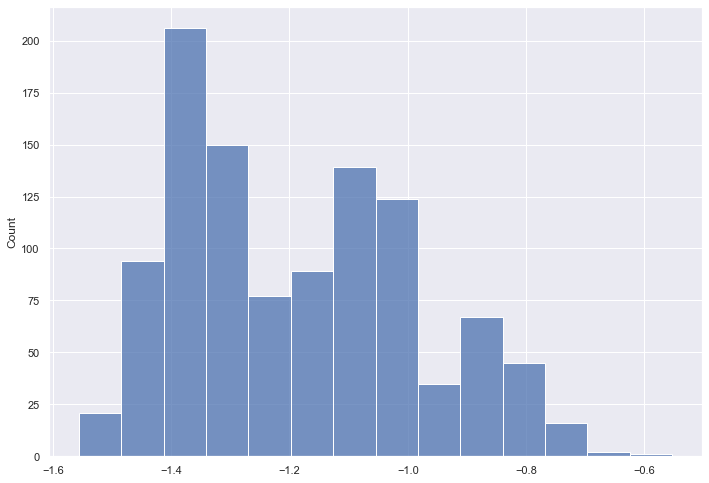

In [197]:
a = []
for i, w1 in enumerate(ws_sub):
    for j in range(i+1, len(ws_sub)):
        w2 = ws_sub[j]
        a.append(get_num_overlaps(w1,w2))

sns.histplot(np.log10([x for x in a if x>0]))

<AxesSubplot:ylabel='Count'>

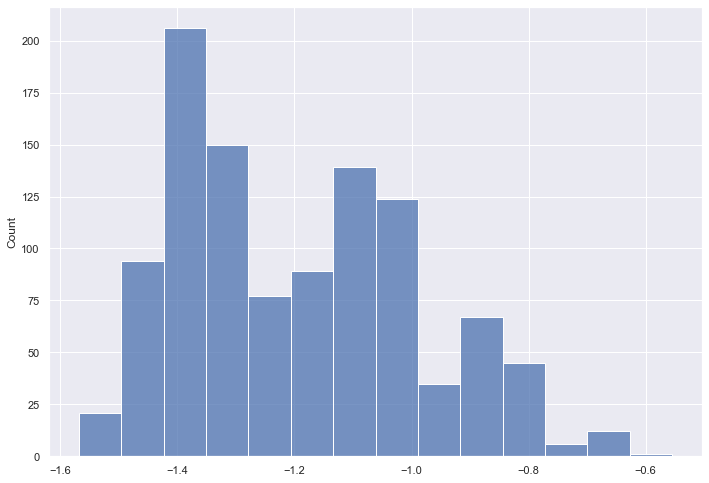

In [201]:
sns.histplot(np.log10([int(1000*x)/1000 for x in a if x>0]))

In [179]:
w2

1

In [182]:
len([ "BABE", "DOLL", "GIRL", "WOMB", "TASK", "SOUL", "BRAT", "SICK", "AUNT", "LOVE", "YOUR", "LIKE", "GETS", "TEEN", "BAIRN", "HUMAN", "LATIN", "SPOIL", "BIRTH", "SPROG", "ISSUE", "LABOR", "TREAT", "ELFIN", "YOUTH", "SCALP", "HEART", "BRIDE", "MOTHER", "COSSET", "SISTER", "ORPHAN", "UTERUS", "KITTEN", "DIAPER", "ANIMAL", "MORTAL", "HANDLE", "CHERUB", "PERSON", "RUGRAT", "URCHIN", "COUPLE", "CRECHE", "EATING", "NEONATE", "INDULGE", "PROJECT", "PUERILE", "PARENTS"])

50

In [183]:
len(ws_sub)

40

In [184]:
len(ws)

95

In [191]:
is_below_cutoff

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [192]:
"[ " + ", ".join('true' if x else 'false' for x in is_below_cutoff) + " ]"

'[ true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false ]'

In [193]:
sum(is_below_cutoff)

54

In [187]:
ss = ["BABE", "DOLL", "GIRL", "WOMB", "TASK", "SOUL", "BRAT", "SICK", "AUNT", "LOVE", "YOUR", "LIKE", "GETS", "TEEN", "BAIRN", "HUMAN", "LATIN", "SPOIL", "BIRTH", "SPROG", "ISSUE", "LABOR", "TREAT", "ELFIN", "YOUTH", "SCALP", "HEART", "BRIDE", "MOTHER", "COSSET", "SISTER", "ORPHAN", "UTERUS", "KITTEN", "DIAPER", "ANIMAL", "MORTAL", "HANDLE", "CHERUB", "PERSON", "RUGRAT", "URCHIN", "COUPLE", "CRECHE", "EATING", "NEONATE", "INDULGE", "PROJECT", "PUERILE", "PARENTS"]
sum(len(s) for s in ss)

263

In [205]:
x = b'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 \n----------\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 42 \n----------\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 \n----------\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 42 \n----------\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 39 42 45 \n----------\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 37 39 42 43 \n----------\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 37 39 42 45 \n----------\n'
[int(idx) for idx in x.split(b"----------")[-2].strip().split()]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 39,
 42,
 45]

In [204]:
x.split(b"----------")

[b'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 \n',
 b'\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 42 \n',
 b'\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 \n',
 b'\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 42 \n',
 b'\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 39 42 45 \n',
 b'\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 37 39 42 43 \n',
 b'\n0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 37 39 42 45 \n',
 b'\n']